In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from Regression_Model import Regression_Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from Hyper_Reg_Tuning import hyper_tuner

Bike_data=pd.read_csv('day.csv')
Bike_data=Bike_data.drop(['dteday','casual','registered'],axis=1)

<h2>Model Training and Evalaution</h2>

Model will trained on the datset as it is to see initial results. We will fine tune afterwards with feature engineering and hyperparemeter tuning to try and achieve better results.

<h3> Model Training and Evaluation Pre-tuning</h3>

In [ ]:
# Let's split the dataset in training and test data
X=Bike_data.drop('cnt',axis=1)
Y=Bike_data['cnt']

#splittiing dataset inn training,validation and test sets, 60% train, 20% validation, 20% test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42) # intiial split to get training data

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42) # second split for validation and test sets


<h4>My Regression Model (Pre-tuning)</h4>

In [3]:
#lets create our models
X_t=np.array(X_train)
Y_t=np.array(Y_train)

val_x=np.array(X_val)
val_y=np.array(Y_val)

test_X=np.array(X_test)
test_Y=np.array(Y_test)

Regressor=Regression_Model()
Regressor.fit(X_t,Y_t,0.005,200)


Reg_MSE_val=Regressor.MSE(val_x,val_y)
Reg_RMSE_val=Regressor.RMSE(val_x,val_y)
Reg_MAE_val=Regressor.MAE(val_x,val_y)
Reg_R_2_val=Regressor.R_2(val_x,val_y)

print(f'The MSE validation error of the model is {Reg_MSE_val}')
print(f'The RMSE validation error of the model is {Reg_RMSE_val}')
print(f'The MAE validation error of the model is {Reg_MAE_val}')
print(f'The R2 value of the model on the validation set is {Reg_R_2_val}\n')


Reg_MSE_Test=Regressor.MSE(test_X,test_Y)
Reg_RMSE_Test=Regressor.RMSE(test_X,test_Y)
Reg_MAE_Test=Regressor.MAE(test_X,test_Y)
Reg_R_2_Test=Regressor.R_2(test_X,test_Y)

print(f'The MSE error of the model is {Reg_MSE_Test}')
print(f'The RMSE error of the model is {Reg_RMSE_Test}')
print(f'The MAE error of the model is {Reg_MAE_Test}')
print(f'The R2 value of the model is {Reg_R_2_Test}\n')

The MSE validation error of the model is nan
The RMSE validation error of the model is nan
The MAE validation error of the model is nan
The R2 value of the model on the validation set is nan

The MSE error of the model is nan
The RMSE error of the model is nan
The MAE error of the model is nan
The R2 value of the model is nan



C:\Users\arkev\Bike_Share_Data_Analysis\Regression_Model.py:44: RuntimeWarning: invalid value encountered in subtract
  self.w -= a * gradient_w


<h4> Scikit-Learn's Regression Model (Pre-tuning)</h4>

In [4]:
LR_Mod = LinearRegression()
LR_Mod.fit(X_train, Y_train)

LR_val_Pred=LR_Mod.predict(X_val)

LR_Mod_MSE_val=mean_squared_error(Y_val,LR_val_Pred)
LR_Mod_RMSE_val=np.sqrt(LR_Mod_MSE_val)
LR_Mod_MAE_val=mean_absolute_error(Y_val,LR_val_Pred)
LR_Mod_R_2_val=r2_score(Y_val,LR_val_Pred)

print(f'The MSE validation error of the Linear Regression Model  is {LR_Mod_MSE_val}')
print(f'The RMSE validation error of the  Linear Regression Model  is {LR_Mod_RMSE_val}')
print(f'The MAE validation error of the Linear Regression Model  is {LR_Mod_MAE_val}')
print(f'The R2 validation value of the  Linear Regression Model  is {LR_Mod_R_2_val}\n')


LR_test_Pred=LR_Mod.predict(X_test)

LR_Mod_MSE_test=mean_squared_error(Y_test,LR_test_Pred)
LR_Mod_RMSE_test=np.sqrt(LR_Mod_MSE_test)
LR_Mod_MAE_test=mean_absolute_error(Y_test,LR_test_Pred)
LR_Mod_R_2_test=r2_score(Y_test,LR_test_Pred)

print(f'The MSE test error of the Linear Regression Model  is {LR_Mod_MSE_test}')
print(f'The RMSE test error of the  Linear Regression Model  is {LR_Mod_RMSE_test}')
print(f'The MAE test error of the Linear Regression Model  is {LR_Mod_MAE_test}')
print(f'The R2 test value of the  Linear Regression Model  is {LR_Mod_R_2_test}\n')



The MSE validation error of the Linear Regression Model  is 846055.1705548647
The RMSE validation error of the  Linear Regression Model  is 919.8125736012009
The MAE validation error of the Linear Regression Model  is 619.5040667040788
The R2 validation value of the  Linear Regression Model  is 0.7691078811570952

The MSE test error of the Linear Regression Model  is 751818.4426870595
The RMSE test error of the  Linear Regression Model  is 867.0746465484154
The MAE test error of the Linear Regression Model  is 691.6909557107258
The R2 test value of the  Linear Regression Model  is 0.8120323715326581



<h4>Scikit-Learn's Decision Tree Model (Pre-tuning)</h4>

In [5]:
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

tree_val_Pred=tree.predict(X_val)

tree_MSE_val=mean_squared_error(Y_val,tree_val_Pred)
tree_RMSE_val=np.sqrt(tree_MSE_val)
tree_MAE_val=mean_absolute_error(Y_val,tree_val_Pred)
tree_R_2_val=r2_score(Y_val,tree_val_Pred)

print(f'The MSE validation error of the Decision Tree Model  is {tree_MSE_val}')
print(f'The RMSE validation error of the  Decision Tree Model  is {tree_RMSE_val}')
print(f'The MAE validation error of the Decision Tree Model  is {tree_MAE_val}')
print(f'The R2 validation value of the  Decision Tree Model   is {tree_R_2_val}\n')

tree_test_Pred=tree.predict(X_test)

tree_MSE_test=mean_squared_error(Y_test,tree_test_Pred)
tree_RMSE_test=np.sqrt(tree_MSE_test)
tree_MAE_test=mean_absolute_error(Y_test,tree_test_Pred)
tree_R_2_test=r2_score(Y_test,tree_test_Pred)

print(f'The MSE test error of the Decision Tree Model  is {tree_MSE_test}')
print(f'The RMSE test error of the  Decision Tree Model  is {tree_RMSE_test}')
print(f'The MAE test error of the Decision Tree Model  is {tree_MAE_test}')
print(f'The R2 test value of the Decision Tree Model  is {tree_R_2_test}\n')




The MSE validation error of the Decision Tree Model  is 1996916.7123287672
The RMSE validation error of the  Decision Tree Model  is 1413.1230350994804
The MAE validation error of the Decision Tree Model  is 980.4109589041096
The R2 validation value of the  Decision Tree Model   is 0.4550327840204399

The MSE test error of the Decision Tree Model  is 2452179.870748299
The RMSE test error of the  Decision Tree Model  is 1565.943763596988
The MAE test error of the Decision Tree Model  is 1129.421768707483
The R2 test value of the Decision Tree Model  is 0.3869125726252357



<h4> Scikit-Learn's Random Forest Model (Pre-tuning) </h4>

In [6]:
Random_Tree=RandomForestRegressor(n_estimators=100, random_state=42)
Random_Tree.fit(X_train,Y_train)

Random_Tree_val_Pred=Random_Tree.predict(X_val)

Random_Tree_MSE_val=mean_squared_error(Y_val,Random_Tree_val_Pred)
Random_Tree_RMSE_val=np.sqrt(Random_Tree_MSE_val)
Random_Tree_MAE_val=mean_absolute_error(Y_val,Random_Tree_val_Pred)
Random_Tree_R_2_val=r2_score(Y_val,Random_Tree_val_Pred)

print(f'The MSE validation error of the Random Forest Model  is {Random_Tree_MSE_val}')
print(f'The RMSE validation error of the  Random Forest Model  is {Random_Tree_RMSE_val}')
print(f'The MAE validation error of the Random Forest Model is {Random_Tree_MAE_val}')
print(f'The R2 validation value of the  Random Forest Model   is {Random_Tree_R_2_val}\n')


Random_Tree_test_Pred=Random_Tree.predict(X_test)

Random_Tree_MSE_test=mean_squared_error(Y_test,Random_Tree_test_Pred)
Random_Tree_RMSE_test=np.sqrt(Random_Tree_MSE_test)
Random_Tree_MAE_test=mean_absolute_error(Y_test,Random_Tree_test_Pred)
Random_Tree_R_2_test=r2_score(Y_test,Random_Tree_test_Pred)

print(f'The MSE test error of the Random Forest Model  is {Random_Tree_MSE_test}')
print(f'The RMSE test error of the  Random Forest Model  is {Random_Tree_RMSE_test}')
print(f'The MAE test error of the Random Forest Model is {Random_Tree_MAE_test}')
print(f'The R2 test value of the  Random Forest Model   is {Random_Tree_R_2_test}')

The MSE validation error of the Random Forest Model  is 494217.5405130137
The RMSE validation error of the  Random Forest Model  is 703.0060743073375
The MAE validation error of the Random Forest Model is 454.25801369863024
The R2 validation value of the  Random Forest Model   is 0.8651258935944544

The MSE test error of the Random Forest Model  is 420488.20978163264
The RMSE test error of the  Random Forest Model  is 648.4506224699246
The MAE test error of the Random Forest Model is 473.6185714285714
The R2 test value of the  Random Forest Model   is 0.8948706667681058


As we can see, my model with its current hyperameter has abysmmal performance scores,the score for the decision tree is also bad but far better than my model with the remaining models having remarkably good scores in comparison. I'm going to do some fine-tuning on my model to produce a better result.

<h3> Model Training and Evalaution with Tuning </h3>

<h4> My Regression Model (Tuned)</h4>

In [128]:
X_t=np.array(X_train)
Y_t=np.array(Y_train)

val_x=np.array(X_val)
val_y=np.array(Y_val)

test_X=np.array(X_test)
test_Y=np.array(Y_test)

Regressor=Regression_Model()

Reg_values=hyper_tuner(Regressor, X_t, Y_t, val_x, val_y, 150, 0.0000008, 0.0000090, 0.00000001)

In [129]:
print(f'The best learning rate for my model is {Reg_values[0] }')
print(f'The MSE validation error of the model is {Reg_values[1] }')
print(f'The RMSE validation error of the model is {Reg_values[2] }')
print(f'The MAE validation error of the model is {Reg_values[3] }')
print(f'The R2 value of the model on the validation set is {Reg_values[4]}\n') 

Reg_MSE_Test=Regressor.MSE(test_X,test_Y)
Reg_RMSE_Test=Regressor.RMSE(test_X,test_Y)
Reg_MAE_Test=Regressor.MAE(test_X,test_Y)
Reg_R_2_Test=Regressor.R_2(test_X,test_Y)

print(f'The MSE test error of the model is {Reg_MSE_Test}')
print(f'The RMSE test error of the model is {Reg_RMSE_Test}')
print(f'The MAE test error of the model is {Reg_MAE_Test}')
print(f'The R2 test value of the model is {Reg_R_2_Test}\n')

The best learning rate for my model is 8.990000000000007e-06
The MSE validation error of the model is 3382526.7044915045
The RMSE validation error of the model is 1839.164675740458
The MAE validation error of the model is 1475.8260987353935
The R2 value of the model on the validation set is 0.07689381848402088

The MSE test error of the model is 3219069.89048837
The RMSE test error of the model is 1794.1766608916664
The MAE test error of the model is 1470.2981694802093
The R2 test value of the model is 0.16112611224916895



Due to no considerable improvements after several rounds with different learning rates, the model has shown no significant improvement. This implies the model as it is not effiecient to capture the patterns in the data with gradient descent alone.

In [130]:
#Lets compare weights and biases for my model and the sklearn model
print(f"The weights for my model are \n{Regressor.w}\n")
print(f"The bias parameter for my model is {Regressor.b}\n")

The weights for my model are 
[10.50882226  2.00294867 -0.17168418  2.93146474 -0.03993986  2.9728654
  0.73996432  0.7709926   0.66618341  0.62399108  0.4980444   0.1422785 ]

The bias parameter for my model is 0.856419926482478



In [131]:
print(f"The weights for the Linear Regression model are \n{LR_Mod.coef_}\n")
print(f"The bias parameter for the Linear Regression model  is {LR_Mod.intercept_}\n")

The weights for the Linear Regression model are 
[-6.48425515e+00  4.96081271e+02  4.34509502e+03  1.59117130e+02
 -6.45359324e+02  5.71611113e+01  8.17458978e+01 -6.40139332e+02
 -2.42155440e+03  8.89677223e+03 -1.06674816e+03 -1.80811764e+03]

The bias parameter for the Linear Regression model  is 1091.043406653433



My model was not able to obtain an optimal solution, while Scikit-learn's model was. My model uses gradient descent to find a solution, which is an iterative process. On the other hand, the sklearn model uses a closed-form soultion witht the normal equation to find an exact answer to the problem.

<h3>Feature Importance</h3>

The RandomForest model will be used to gather the most important features to predict total rental count of bikes for future analysis.

In [11]:
# Let's tune hyperparameters to get best results

# 60% training set and 40% test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

Random_Tree=RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 0.5, 0.8]
}

grid_search = GridSearchCV(estimator=Random_Tree,param_grid=param_grid,cv=5)
grid_search.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 0.5, 0.8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [12]:

Random_Tree_test_Pred=grid_search.predict(X_test)

Random_Tree_MSE_test=mean_squared_error(Y_test,Random_Tree_test_Pred)
Random_Tree_RMSE_test=np.sqrt(Random_Tree_MSE_test)
Random_Tree_MAE_test=mean_absolute_error(Y_test,Random_Tree_test_Pred)
Random_Tree_R_2_test=r2_score(Y_test,Random_Tree_test_Pred)

print(f'The MSE test error of the Random Forest Model  is {Random_Tree_MSE_test}')
print(f'The RMSE test error of the  Random Forest Model  is {Random_Tree_RMSE_test}')
print(f'The MAE test error of the Random Forest Model is {Random_Tree_MAE_test}')
print(f'The R2 test value of the  Random Forest Model   is {Random_Tree_R_2_test}\n')


The MSE test error of the Random Forest Model  is 470293.2090307167
The RMSE test error of the  Random Forest Model  is 685.7792713626716
The MAE test error of the Random Forest Model is 470.39699658703074
The R2 test value of the  Random Forest Model   is 0.8774438871898619



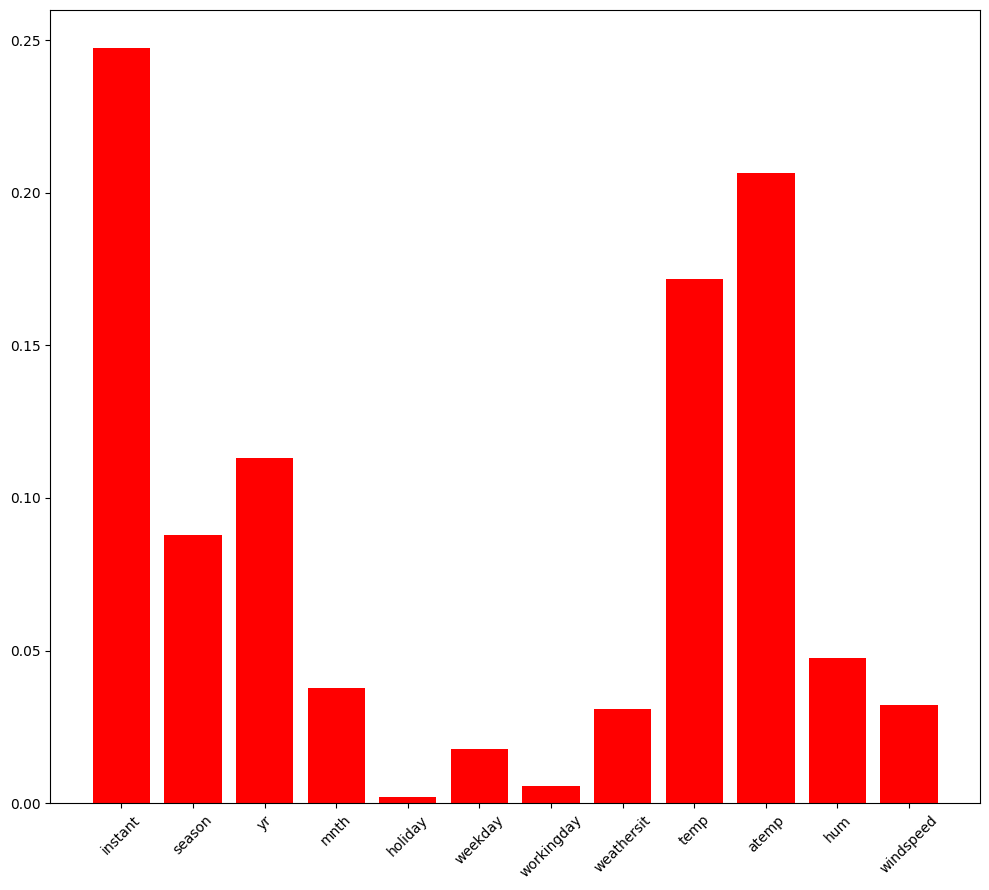

In [13]:
best_estimator = grid_search.best_estimator_

importances = best_estimator.feature_importances_
plt.figure(figsize=(10, 9)) 
plt.bar(X.columns, importances, color="red")
plt.xticks(rotation=45)  
plt.tight_layout()  

Based on the graph, the most important features for determining total bike rental count (cnt) are the day and what the consumer assumes is the correct temperature. This makes sense , in that we have already determined that their is an underlying daily trend due to rental count fluctuating with the seasons throughout the year.

<h3> Saving the Models</h3>

In [132]:
from joblib import dump,load

# lets save th model
dump(best_estimator,'Forest_Regressor.joblib')


['Forest_Regressor.joblib']

In [134]:
dump(Regressor,'My_Model.joblib')

['My_Model.joblib']